# Average Scaled MinHash sketch sizes across Genbank domains

scaled = 2000

In [2]:
%matplotlib inline
%config InlineBackend.close_figures = False

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from ficus import FigureManager

sns.set()

In [3]:
domains = ("viral", "archaea", "bacteria", "fungi", "protozoa")
# domains = ("viral", archaea", "protozoa", "fungi")
scaled = 2000

In [4]:
all_domains = []
for domain in domains:
    df = pd.read_csv(f"/data/databases/{domain}.csv").set_index("id")
    df["domain"] = domain
    all_domains.append(df)

In [5]:
all_domains_df = pd.concat(all_domains)

In [6]:
all_domains_df

,21,unique_21,31,unique_31,51,unique_51,bp,domain
id,,,,,,,,
GCA_001504295.1,0,57,0,47,0,26,77,viral
GCA_004070195.1,1,1744,0,1742,1,1726,1767,viral
GCA_004060515.1,0,1744,0,1741,0,1715,1767,viral
GCA_003375945.1,2,4427,1,4414,3,4382,4433,viral
GCA_003825575.1,2,4530,4,4552,5,4456,4548,viral
...,...,...,...,...,...,...,...,...
GCA_002563875.1,28326,56951601,28502,56151628,28580,57463890,58845926,protozoa
GCA_002286825.1,39790,81827887,40509,84021511,41276,86828247,126261093,protozoa
GCA_001939145.1,307361,624386858,333216,679427125,349098,701412744,808226712,protozoa


In [7]:
df = all_domains_df

In [8]:
df.head()

,21,unique_21,31,unique_31,51,unique_51,bp,domain
id,,,,,,,,
GCA_001504295.1,0,57,0,47,0,26,77,viral
GCA_004070195.1,1,1744,0,1742,1,1726,1767,viral
GCA_004060515.1,0,1744,0,1741,0,1715,1767,viral
GCA_003375945.1,2,4427,1,4414,3,4382,4433,viral
GCA_003825575.1,2,4530,4,4552,5,4456,4548,viral


In [9]:
df.groupby("domain").describe().T

domain                archaea      bacteria         fungi      protozoa  \
21        count  5.234000e+03  4.644850e+05  6.984000e+03  1.093000e+03   
          mean   7.670797e+02  1.945687e+03  1.391696e+04  1.811530e+04   
          std    5.752289e+02  7.242891e+02  1.315176e+04  2.782104e+04   
          min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
          25%    3.722500e+02  1.360000e+03  5.896750e+03  8.392000e+03   
          50%    7.180000e+02  2.300000e+03  1.338750e+04  1.336500e+04   
          75%    1.052750e+03  2.401000e+03  1.886475e+04  2.143500e+04   
          max    6.476000e+03  8.842000e+03  7.170950e+05  3.886730e+05   
unique_21 count  5.234000e+03  4.644850e+05  6.984000e+03  1.093000e+03   
          mean   1.538620e+06  3.914397e+06  2.785766e+07  3.710507e+07   
          std    1.152912e+06  1.450580e+06  2.641853e+07  5.778237e+07   
          min    1.240000e+02  1.830000e+02  4.530000e+02  4.350000e+02   
          25%    7.534760e+05  2.757934e+06  1.173394e+07  1.723780e+07   
          50%    1.440550e+06  4.659010e+06  2.692038e+07  2.726086e+07   
          75%    2.102861e+06  4.848204e+06  3.778501e+07  4.347383e+07   
          max    1.325708e+07  1.780594e+07  1.442133e+09  7.898161e+08   
31        count  5.234000e+03  4.644850e+05  6.984000e+03  1.093000e+03   
          mean   7.661882e+02  1.948371e+03  1.423872e+04  1.889229e+04   
          std    5.777630e+02  7.205018e+02  1.496714e+04  3.041001e+04   
          min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
          25%    3.760000e+02  1.343000e+03  5.840500e+03  8.653000e+03   
          50%    7.080000e+02  2.299000e+03  1.360050e+04  1.367100e+04   
          75%    1.056000e+03  2.415000e+03  1.908050e+04  2.180300e+04   
          max    6.684000e+03  9.091000e+03  8.094920e+05  4.232120e+05   
unique_31 count  5.234000e+03  4.644850e+05  6.984000e+03  1.093000e+03   
          mean   1.540598e+06  3.911084e+06  2.853948e+07  3.855505e+07   
          std    1.154493e+06  1.445400e+06  2.990429e+07  6.272012e+07   
          min    1.030000e+02  1.720000e+02  3.710000e+02  3.590000e+02   
          25%    7.515648e+05  2.762092e+06  1.172212e+07  1.769046e+07   
          50%    1.440841e+06  4.624476e+06  2.711188e+07  2.784253e+07   
          75%    2.112164e+06  4.847652e+06  3.813983e+07  4.421073e+07   
          max    1.305429e+07  1.772448e+07  1.608210e+09  9.104097e+08   
51        count  5.234000e+03  4.644850e+05  6.984000e+03  1.093000e+03   
          mean   7.667789e+02  1.923791e+03  1.455035e+04  1.951265e+04   
          std    5.796267e+02  7.062514e+02  1.663432e+04  3.261434e+04   
          min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
          25%    3.742500e+02  1.370000e+03  5.866000e+03  8.777000e+03   
          50%    7.100000e+02  2.241000e+03  1.367850e+04  1.397400e+04   
          75%    1.047000e+03  2.358000e+03  1.919625e+04  2.225300e+04   
          max    6.670000e+03  8.900000e+03  8.819510e+05  5.036190e+05   
unique_51 count  5.234000e+03  4.644850e+05  6.984000e+03  1.093000e+03   
          mean   1.543335e+06  3.906265e+06  2.919144e+07  3.983384e+07   
          std    1.159104e+06  1.444395e+06  3.339712e+07  6.711092e+07   
          min    6.400000e+01  1.520000e+02  2.130000e+02  2.020000e+02   
          25%    7.543002e+05  2.741633e+06  1.175122e+07  1.775127e+07   
          50%    1.439552e+06  4.607356e+06  2.734920e+07  2.827762e+07   
          75%    2.117172e+06  4.833022e+06  3.832291e+07  4.534296e+07   
          max    1.315746e+07  1.766910e+07  1.763870e+09  1.064812e+09   
bp        count  5.234000e+03  4.644850e+05  6.984000e+03  1.093000e+03   
          mean   1.563439e+06  3.950795e+06  3.101579e+07  4.503896e+07   
          std    1.174559e+06  1.470958e+06  4.041960e+07  7.960065e+07   
          min    1.640000e+02  2.020000e+02  1.265000e+03  6.020000e+02   
          25%    7.643212

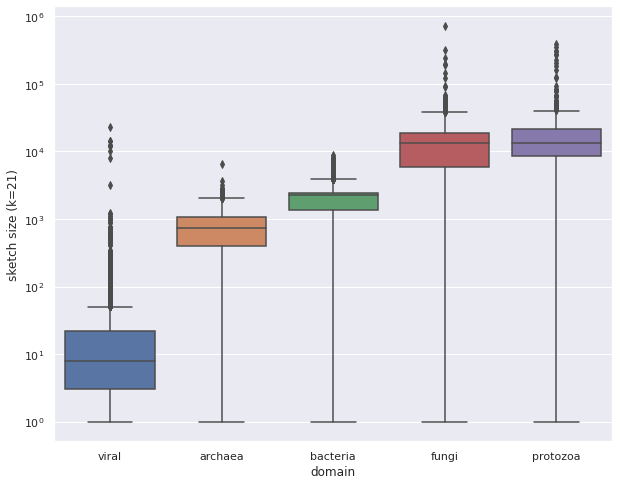

In [14]:
plot_df = df[df != 0]

with FigureManager(figsize=(10, 8), show=True, filename="../figures/sizes.png") as (fig, ax):
    sns.boxplot(data=plot_df, y="21", x="domain", ax=ax)
    # sns.swarmplot(x="domain", y="21", data=plot_df, color=".2", ax=ax)
    ax.set_yscale("log")
    ax.set_ylabel("sketch size (k=21)")

In [10]:
plot_df.head()

,21,unique_21,31,unique_31,51,unique_51,bp,domain
id,,,,,,,,
GCA_001504295.1,NaN,57.0,NaN,47.0,NaN,26.0,77,viral
GCA_004070195.1,1.0,1744.0,NaN,1742.0,1.0,1726.0,1767,viral
GCA_004060515.1,NaN,1744.0,NaN,1741.0,NaN,1715.0,1767,viral
GCA_003375945.1,2.0,4427.0,1.0,4414.0,3.0,4382.0,4433,viral
GCA_003825575.1,2.0,4530.0,4.0,4552.0,5.0,4456.0,4548,viral


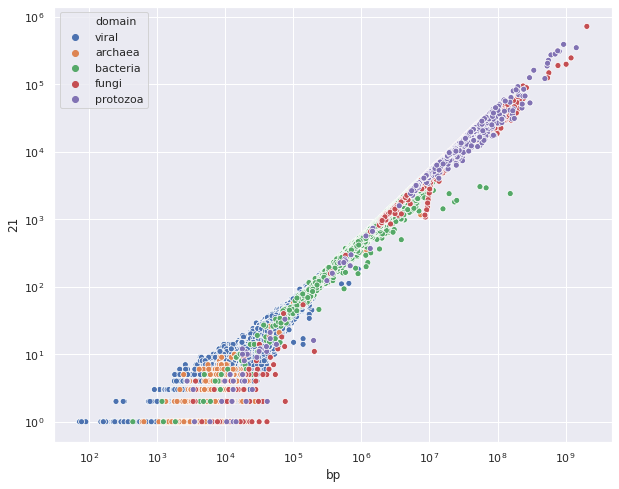

In [11]:
with FigureManager(figsize=(10, 8), show=True) as (fig, ax):
    sns.scatterplot(data=plot_df, y="21", x="bp", hue="domain", ax=ax)
    ax.set_xscale("log")
    ax.set_yscale("log")

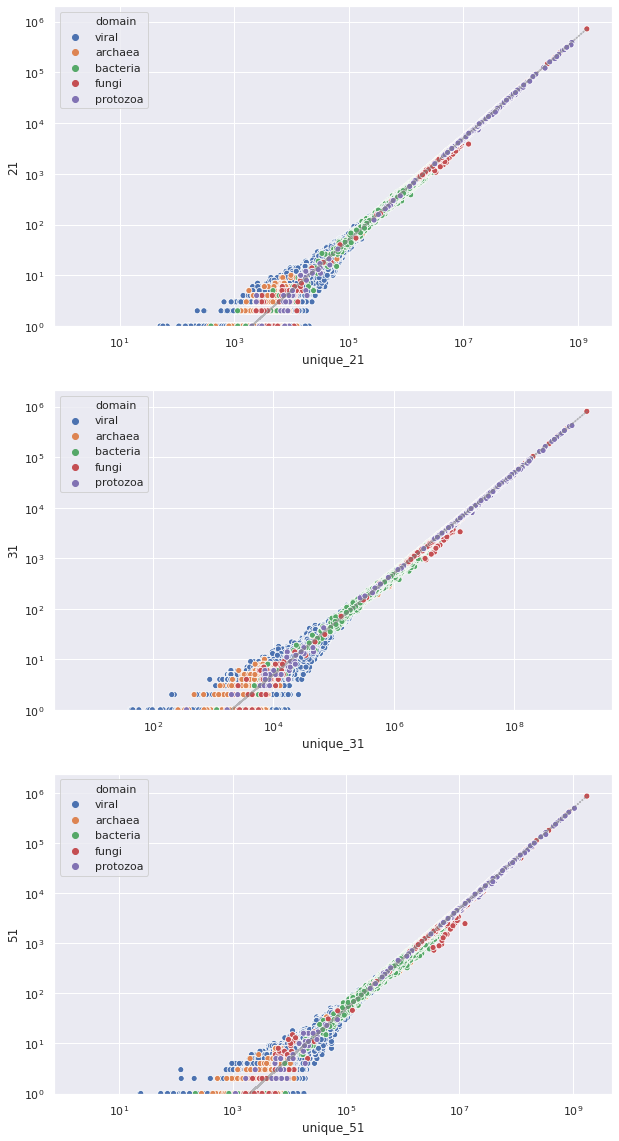

In [12]:
with FigureManager(figsize=(10, 20), show=True, ncols=1, nrows=3) as (fig, axes):
    for k, ax in zip(("21", "31", "51"), axes):
        ax.plot(
            plot_df[f"unique_{k}"],
            plot_df[f"unique_{k}"] / 2000,
            color="gray",
            alpha=0.5,
            dashes=[1, 1],
        )
        sns.scatterplot(data=plot_df, y=k, x=f"unique_{k}", hue="domain", ax=ax)
        ax.set_xscale("log")
        ax.set_yscale("log")
        ax.set_ylim((1, None))

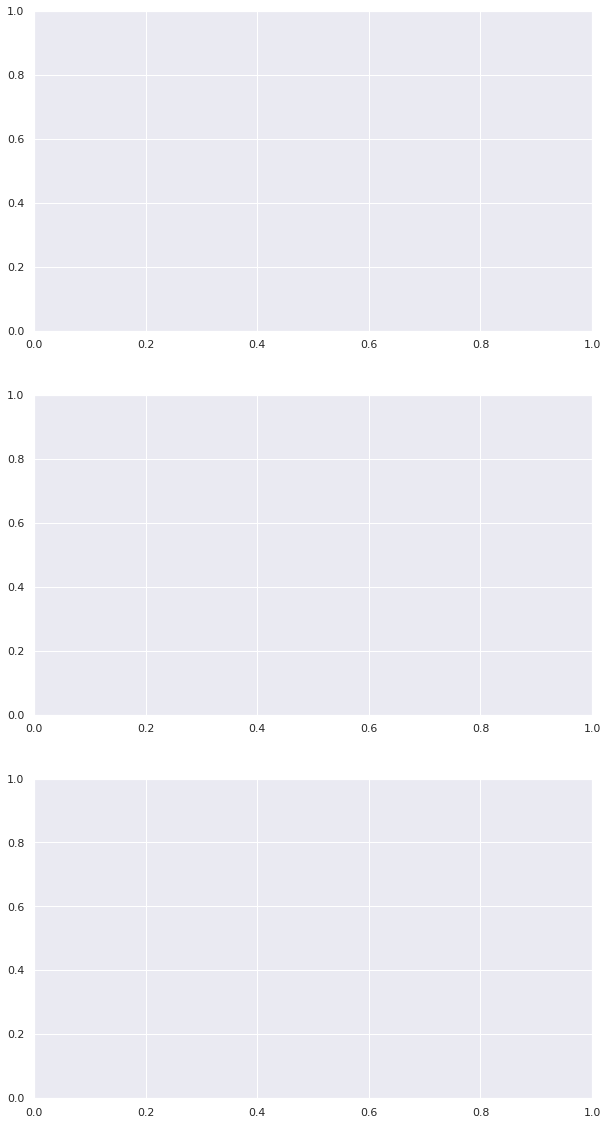

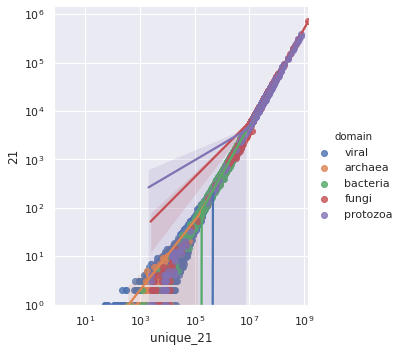

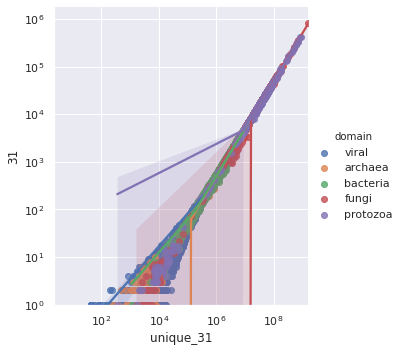

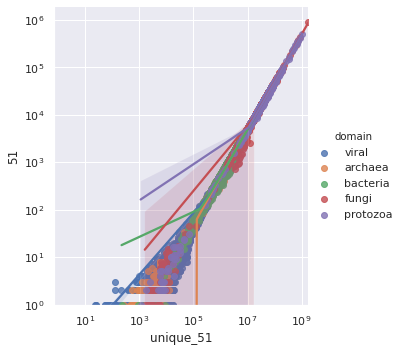

In [13]:
with FigureManager(figsize=(10, 20), show=True, ncols=1, nrows=3) as (fig, axes):
    for k, ax in zip(("21", "31", "51"), axes):
        g = sns.lmplot(data=plot_df, y=k, x=f"unique_{k}", hue="domain")
        g.ax.set_xscale("log")
        g.ax.set_yscale("log")
        g.ax.set_ylim((1, None))

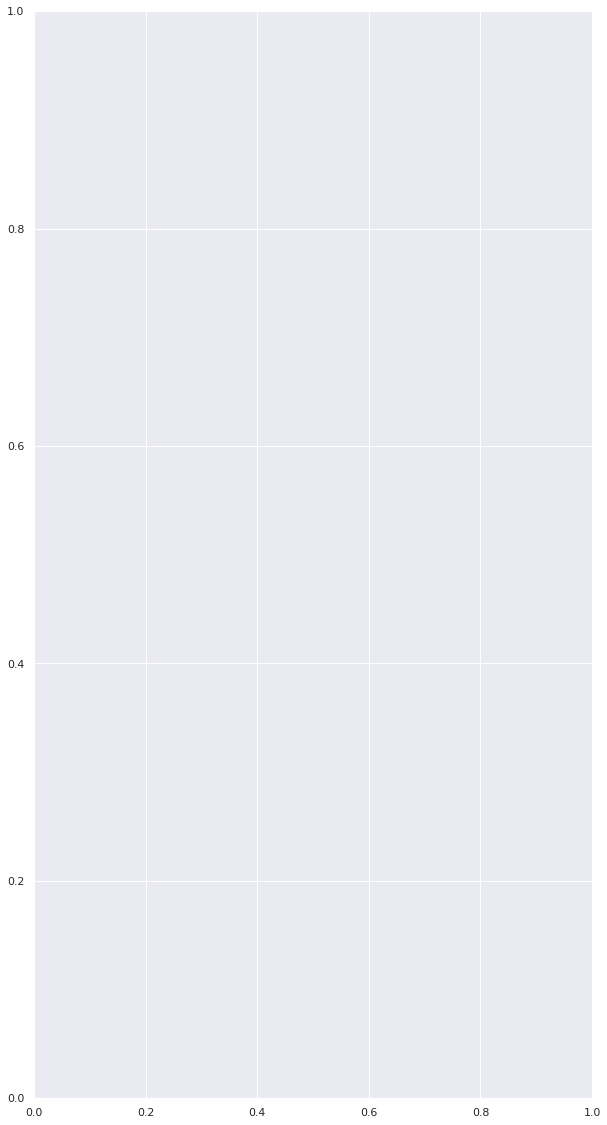

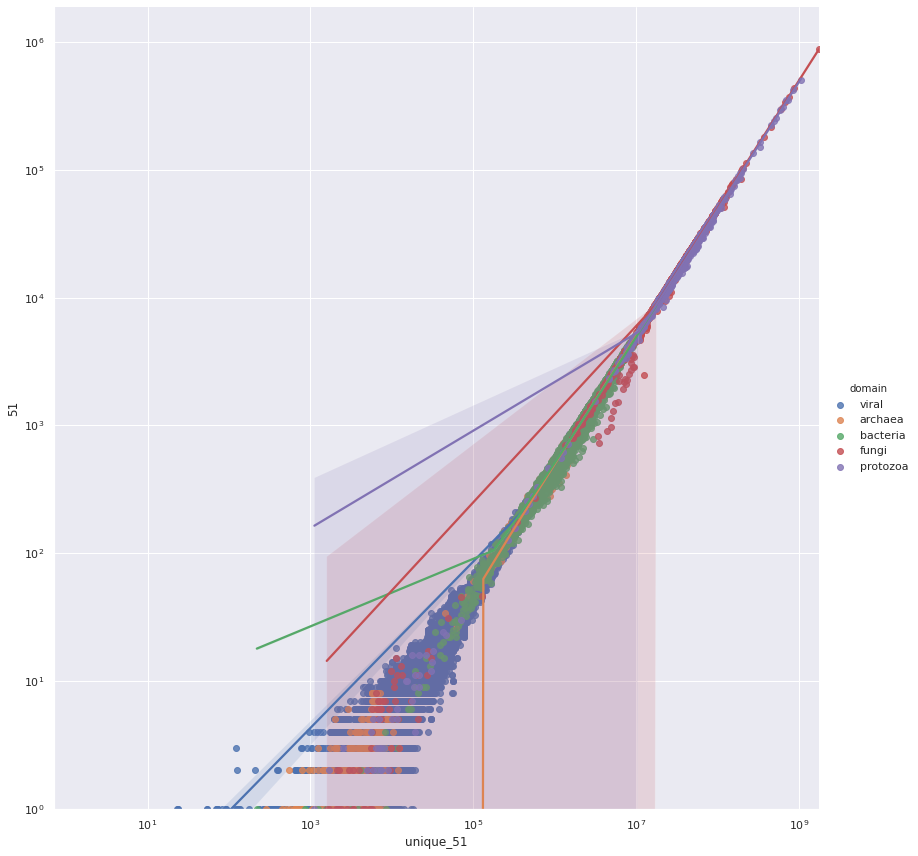

In [14]:
k = "51"
with FigureManager(figsize=(10, 20), show=True) as (fig, axes):
    g = sns.lmplot(data=plot_df, y=k, x=f"unique_{k}", hue="domain", height=12)
    g.ax.set_xscale("log")
    g.ax.set_yscale("log")
    g.ax.set_ylim((1, None))